Barmat: Python 2.7 example
------------------------
Recreate a plot from Gao's 2008 Caltech Thesis (figure 2.5)

In [1]:
from __future__ import division

# import sys
# sys.path.append('./barmat/')

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import numpy as np
np.seterr(all='raise')

#For pretty plots out of the box
import seaborn as sns

import barmat

In [3]:
#Material parameters for Al from Pöpel, 1989 (his reference 19), except 2*bcs = 3.4
bcs = 3.4/2.0
tc = 1.178
london0 = 15.4e-9
vf=1.34e6
mfp = 10e-6

#These can be calculated using the built-in convenience functions
delta0 = barmat.tools.get_delta0(tc, bcs=bcs)

#Pöpel uses a table value that is slightly different, so results may not be exact
ksi0 = barmat.tools.get_ksi0(vf, delta0)

#Vector of interesting temperatures
trs = [0.5, 0.7, 0.8, 0.9]

#Since kB*Tc = delta0/bcs and fr = h*f/delta0, then h*f/kB*Tc = fr/bcs
frs = np.linspace(0, 8, 50)/bcs

In [4]:
#Empty dict to hold results as function of temps
zsd = {}

for tr in trs:
    zsd[tr] = barmat.get_Zvec(frs, tc, vf, london0, tr=tr, mfp=mfp, axis='frequency', 
                              bcs=bcs, output_depths = True, boundary = 'd')


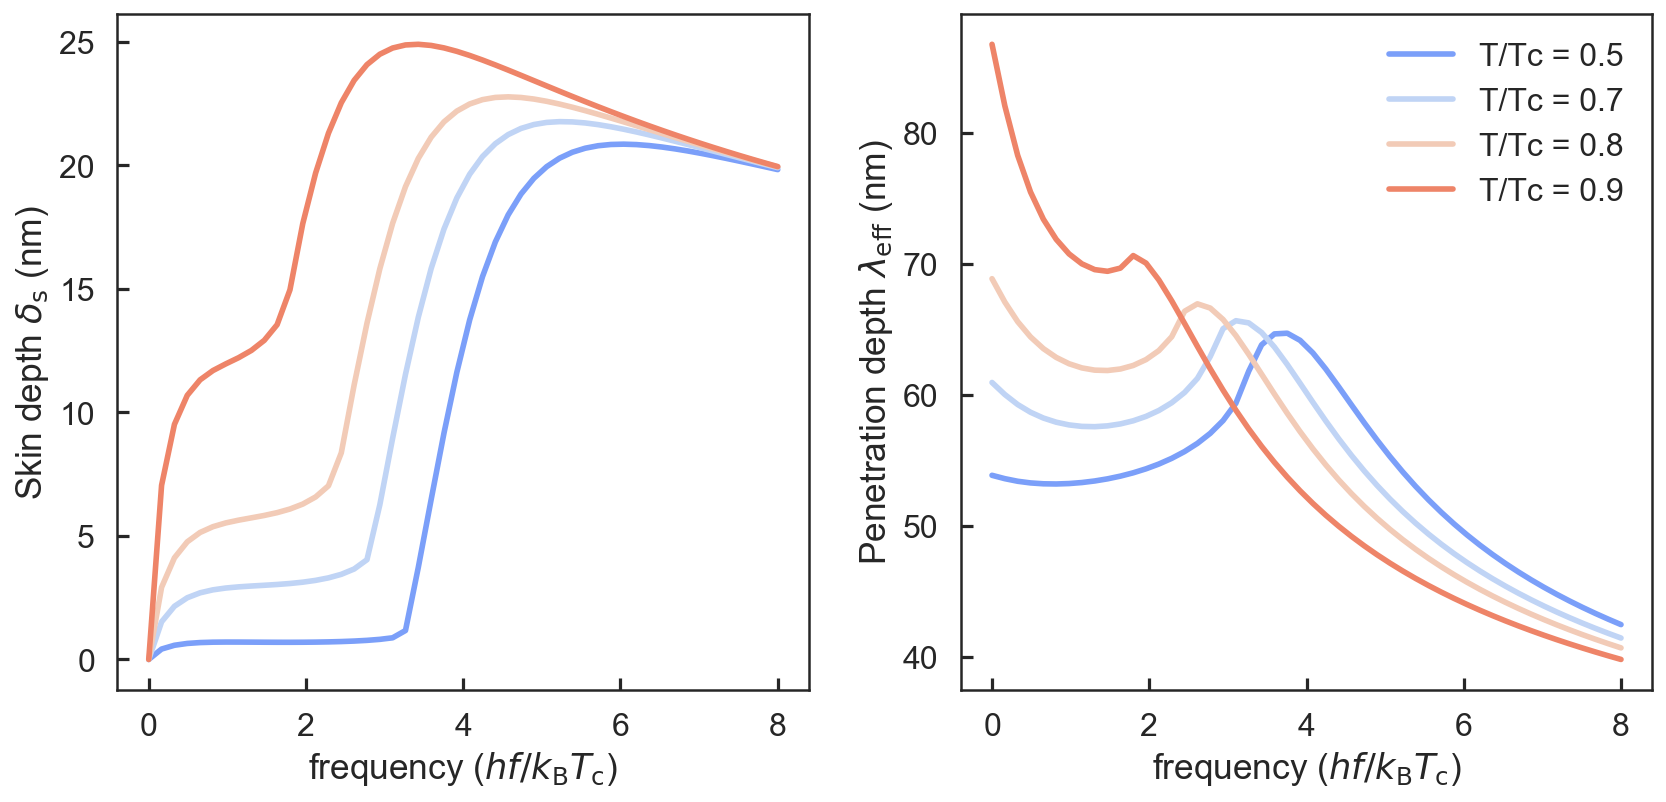

In [5]:
#Some code to make things pretty (have to call this before making the figure)
sns.set_context("poster") #This makes all the text bigger automatically
sns.set_style("ticks",{"xtick.direction" : u"in",
                       "ytick.direction" : u"in"})


sns.set_palette(sns.color_palette("coolwarm", 4))

fig = plt.figure()
fig.set_size_inches(12, 6)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


for tr in trs:
    line, = ax1.plot(frs*bcs, 1e9*np.real(zsd[tr]))
    ax2.plot(frs*bcs, 1e9*np.imag(zsd[tr]), color=line.get_color(), label="T/Tc = " + str(tr))


ax1.set_xlabel("frequency ($hf/k_\mathrm{B}T_\mathrm{c}$)")
ax2.set_xlabel("frequency ($hf/k_\mathrm{B}T_\mathrm{c}$)")
ax1.set_ylabel("Skin depth $\delta_\mathrm{s}$ (nm)")
ax2.set_ylabel("Penetration depth $\lambda_\mathrm{eff}$ (nm)")
ax2.legend(loc='best')
fig.tight_layout()